**Student Name: Sushant Khanal**
**Lu Id: L20551749**

**Assignment1: Data Science and Big Data Analysis**

**"Car Evaluation Database"**

This database can be used to predict whether a car falls under "acceptable", "unacceptable", "good" or "very good" class based on six attributes: buying, maintenance, doors, persons, lug_boot and saftey.

In [1]:
import pandas as pd 
import numpy as np 
import math 

#load cars data set into a dataframe named "cars"
cars = pd.read_csv('car.data',index_col = False, header=None)

#Setting the column names for out data
cars.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation'] 

In [2]:
#looking at the info of our dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint       1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safety      1728 non-null   object
 6   evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**Attribute Type:**

buying: ordinal, 

maintenance: ordinal, 

doors: Integer, 

persons: Integer, 

lug_boot: ordinal,  

saftey: ordinal

In [3]:
#Let's check if there are any missing values in our dataset 
cars.isnull().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
evaluation    0
dtype: int64

In [201]:
#looking for unique values in buying column
cars['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [202]:
#looking for unique values in maint column
cars['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [203]:
#looking for unique values in doors column
cars['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [204]:
#looking for unique values in persons column
cars['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [205]:
#looking for unique values in lug_boot column
cars['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [206]:
#looking for unique values in safety column
cars['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

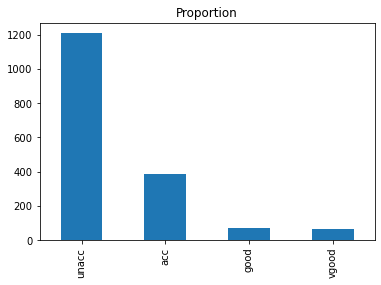

In [4]:
#Looking at the class distribution of the dataframe
cars.describe()
cars.evaluation.value_counts().plot(kind='bar', title='Proportion');

**We can see that out data is Imbalanced. 
If we use this data our prediction will be heavily 
biased towards unacc data type
We have to balance our data**

In [7]:
class_count = cars.evaluation.value_counts()
max_class = max(class_count)
max_class

1210

In [8]:
#Balancing the Data

#seperate the data based on class
cars_class_0 = cars[cars['evaluation'] == "acc"]
cars_class_1 = cars[cars['evaluation'] == "good"]
cars_class_2 = cars[cars['evaluation'] == "unacc"]
cars_class_3 = cars[cars['evaluation'] == "vgood"]

# Oversampling
cars_class_0_over = cars_class_0.sample(max_class,replace = True)
cars_class_1_over = cars_class_1.sample(max_class,replace = True)
cars_class_3_over = cars_class_3.sample(max_class,replace = True)

#not using maximum class
cars_os = pd.concat([cars_class_0_over, cars_class_1_over, cars_class_3_over, cars_class_2], axis = 0)
cars_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 638 to 1725
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      4840 non-null   object
 1   maint       4840 non-null   object
 2   doors       4840 non-null   object
 3   persons     4840 non-null   object
 4   lug_boot    4840 non-null   object
 5   safety      4840 non-null   object
 6   evaluation  4840 non-null   object
dtypes: object(7)
memory usage: 302.5+ KB


acc      1210
good     1210
unacc    1210
vgood    1210
Name: evaluation, dtype: int64

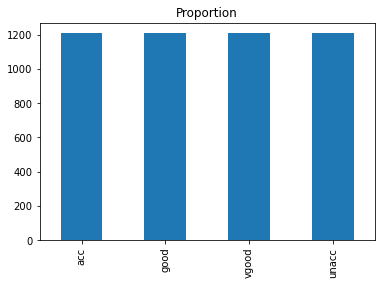

In [9]:
#We can see that the sample is now balanced
cars_os.evaluation.value_counts().plot(kind='bar', title='Proportion');
cars_os['evaluation'].value_counts().sort_index()

In [10]:
#Since the data set is large we take 11 percent random samples

samplingPercent = 11
sampleLength = (11/100) * len(cars_os)
sampleLength = math.floor(sampleLength)
cars_rd = cars_os.sample(sampleLength)

len(cars_rd)

532

** Data Maps **

**We use map1 to replace data in columns "buying" and "maint"
map_1 = {'vhigh': 4, 'high': 3, 'med': 2, 'low:': 1}**

**We use map2 to replace data in column "lug_boot" 
map_2 = {'small': 1, 'med': 2, 'big': 3}**

**We use map3 to replace data in column "saftey"
map_3 = {'low': 1, 'med': 2, 'high': 3}**

**Also, we replace "5more" with 5 and "more" with 5 in columns "doors" and "persons" respectively**

In [11]:
# Data Cleaning
cars_rd.doors = cars_rd.doors.replace({"5more": 5}) 
cars_rd.persons = cars_rd.persons.replace({"more": 5})
cars_rd.head()

cars_rd.buying.replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace = True)
cars_rd.maint.replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace = True)

cars_rd.lug_boot.replace(('small','med','big'),(1, 2, 3), inplace=True)
cars_rd.safety.replace(('low','med','high'), (1, 2, 3), inplace=True)

cars_rd

,buying,maint,doors,persons,lug_boot,safety,evaluation
1472,1,3,4,4,2,3,vgood
193,4,3,5,2,2,2,unacc
755,3,2,5,5,3,3,acc
397,4,1,4,5,1,2,unacc
1052,2,3,4,5,3,3,acc
...,...,...,...,...,...,...,...
1268,2,1,4,5,3,3,vgood
1267,2,1,4,5,3,2,good
1723,1,1,5,5,2,2,good
1472,1,3,4,4,2,3,vgood


In [253]:
#checking the edited data frame

cars_rd.info()
len(cars_rd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 1717 to 1712
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      532 non-null    object
 1   maint       532 non-null    object
 2   doors       532 non-null    object
 3   persons     532 non-null    object
 4   lug_boot    532 non-null    object
 5   safety      532 non-null    object
 6   evaluation  532 non-null    object
dtypes: object(7)
memory usage: 33.2+ KB


532

Now that our data frame is clean and balanced, we calculate distance and similarity for 
each attribute based on the attribute type

#for ordinal attributes, #similarity = 1 - (|p-q| / (n-1))

#for RATIO ATTRIBUTE
dist = |p-q|; similarity = 1/(1+dist)

In [12]:
#Initializing Similarity matrix for each attribute

array_buying = np.zeros((len(cars_rd),len(cars_rd)))
array_maint = np.zeros((len(cars_rd),len(cars_rd)))
array_doors = np.zeros((len(cars_rd),len(cars_rd)))
array_persons = np.zeros((len(cars_rd),len(cars_rd)))
array_lugboot = np.zeros((len(cars_rd),len(cars_rd)))
array_safety = np.zeros((len(cars_rd),len(cars_rd)))

array_safety

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#ordinal attribute
#similarity = 1 - (|p-q| / (n-1))
#Filling the initialised similarity matrix for attribute "buying"

buying_list = cars_rd['buying'].tolist()
length = len(buying_list)
for i in range(0, length):
    for j in range (i, length):
        array_buying[i,j] = 1 - ((abs (buying_list[i] - buying_list[j]))/(4-1))
        array_buying[j,i] = 1 - ((abs (buying_list[j] - buying_list[i]))/(4-1))

print(array_buying)

[[1.         0.         0.33333333 ... 1.         1.         0.66666667]
 [0.         1.         0.66666667 ... 0.         0.         0.33333333]
 [0.33333333 0.66666667 1.         ... 0.33333333 0.33333333 0.66666667]
 ...
 [1.         0.         0.33333333 ... 1.         1.         0.66666667]
 [1.         0.         0.33333333 ... 1.         1.         0.66666667]
 [0.66666667 0.33333333 0.66666667 ... 0.66666667 0.66666667 1.        ]]


In [14]:
#ordinal attribute
#similarity = 1 - (|p-q| / (n-1))
#Filling the initialised similarity matrix for attribute "maint"

maint_list = cars_rd['maint'].tolist()
length = len(maint_list)
for i in range(0, length):
    for j in range (i, length):
        array_maint[i,j] = 1 - ((abs (maint_list[i] - maint_list[j]))/(4-1))
        array_maint[j,i] = 1 - ((abs (maint_list[i] - maint_list[j]))/(4-1))

print(array_maint)

[[1.         1.         0.66666667 ... 0.33333333 1.         0.33333333]
 [1.         1.         0.66666667 ... 0.33333333 1.         0.33333333]
 [0.66666667 0.66666667 1.         ... 0.66666667 0.66666667 0.66666667]
 ...
 [0.33333333 0.33333333 0.66666667 ... 1.         0.33333333 1.        ]
 [1.         1.         0.66666667 ... 0.33333333 1.         0.33333333]
 [0.33333333 0.33333333 0.66666667 ... 1.         0.33333333 1.        ]]


In [15]:
#RATIO ATTRIBUTE
#dist = |p-q|; similarity = 1/(1+dist)
#Filling the initialised similarity matrix for attribute "doors"

doors_list = cars_rd['doors'].tolist()
length = len(doors_list)
for i in range(0, length):
    for j in range (i, length):
        array_doors[i,j] = 1 / (1 + (abs (int(doors_list[i]) - int(doors_list[j]))))
        array_doors[j, i] = 1 / (1 + (abs (int(doors_list[i]) - int(doors_list[j]))))

print(array_doors)

[[1.         0.5        0.5        ... 0.5        1.         0.5       ]
 [0.5        1.         1.         ... 1.         0.5        0.33333333]
 [0.5        1.         1.         ... 1.         0.5        0.33333333]
 ...
 [0.5        1.         1.         ... 1.         0.5        0.33333333]
 [1.         0.5        0.5        ... 0.5        1.         0.5       ]
 [0.5        0.33333333 0.33333333 ... 0.33333333 0.5        1.        ]]


In [16]:
#for RATIO ATTRIBUTE
# dist = |p-q|; similarity = 1/(1+dist)
#Filling the initialised similarity matrix for attribute "persons"

persons_list = cars_rd['persons'].tolist()
length = len(persons_list)
for i in range(0, length):
    for j in range (i, length):
        array_persons[i,j] = 1 / (1 + (abs (int(persons_list[i]) - int(persons_list[j]))))
        array_persons[j, i] = 1 / (1 + (abs (int(persons_list[i]) - int(persons_list[j]))))

print(array_persons)

[[1.         0.33333333 0.5        ... 0.5        1.         1.        ]
 [0.33333333 1.         0.25       ... 0.25       0.33333333 0.33333333]
 [0.5        0.25       1.         ... 1.         0.5        0.5       ]
 ...
 [0.5        0.25       1.         ... 1.         0.5        0.5       ]
 [1.         0.33333333 0.5        ... 0.5        1.         1.        ]
 [1.         0.33333333 0.5        ... 0.5        1.         1.        ]]


In [17]:
#ordinal attributes 
#similarity = 1 - (|p-q| / (n-1))
#Filling the initialised similarity matrix for attribute "lug_boot"

lugboot_list = cars_rd['lug_boot'].tolist()
length = len(lugboot_list)
for i in range(0, length):
    for j in range (i, length):
        array_lugboot[i,j] = 1 - ((abs (int(lugboot_list[i]) - int(lugboot_list[j])))/(3-1))
        array_lugboot[j, i] = 1 - ((abs (int(lugboot_list[j]) - int(lugboot_list[i])))/(3-1))

print(array_lugboot)

[[1.  1.  0.5 ... 1.  1.  0.5]
 [1.  1.  0.5 ... 1.  1.  0.5]
 [0.5 0.5 1.  ... 0.5 0.5 1. ]
 ...
 [1.  1.  0.5 ... 1.  1.  0.5]
 [1.  1.  0.5 ... 1.  1.  0.5]
 [0.5 0.5 1.  ... 0.5 0.5 1. ]]


In [22]:
#for ordinal attributes 
#similarity = 1 - (|p-q| / (n-1))
#Filling the initialised similarity matrix for attribute "saftey"

safety_list = cars_rd['safety'].tolist()
length = len(safety_list)
for i in range(0, length):
    for j in range (i, length):
        array_safety[i,j] = 1 - ((abs (int(safety_list[i]) - int(safety_list[j])))/(3-1))
        array_safety[j, i] = 1 - ((abs (int(safety_list[j]) - int(safety_list[i])))/(3-1))

print(array_safety)

[[1.  0.5 1.  ... 0.5 1.  1. ]
 [0.5 1.  0.5 ... 1.  0.5 0.5]
 [1.  0.5 1.  ... 0.5 1.  1. ]
 ...
 [0.5 1.  0.5 ... 1.  0.5 0.5]
 [1.  0.5 1.  ... 0.5 1.  1. ]
 [1.  0.5 1.  ... 0.5 1.  1. ]]


In [24]:
#Combining Similarity
#Creating Dataframe to store similairty value of each data objects attribute-wise

mat1 = pd.DataFrame(array_buying)
mat2 = pd.DataFrame(array_maint)
mat3 = pd.DataFrame(array_doors)
mat4 = pd.DataFrame(array_persons)
mat5 = pd.DataFrame(array_lugboot)
mat6 = pd.DataFrame(array_safety)

final = np.zeros((len(cars_rd),len(cars_rd)))

In [25]:
# Combining similarity formula 
wt = 1
for i in range(len(cars_rd)):
    for j in range(i,len(cars_rd)):
        final[i,j] = final[j,i] = (
            wt*mat1.loc[i,j]+
            wt*mat2.loc[i,j]+
            wt*mat3.loc[i,j]+
            wt*mat4.loc[i,j]+
            wt*mat5.loc[i,j]+
            wt*mat6.loc[i,j]
        )/6
final_matrix = pd.DataFrame(final)
final_matrix

,0,1,2,3,4,5,6,7,8,9,...,522,523,524,525,526,527,528,529,530,531
0,1.000000,0.555556,0.583333,0.472222,0.777778,0.777778,0.638889,0.694444,0.416667,0.611111,...,0.805556,0.333333,0.694444,0.666667,0.500000,0.666667,0.583333,0.638889,1.000000,0.666667
1,0.555556,1.000000,0.597222,0.597222,0.513889,0.500000,0.750000,0.486111,0.611111,0.791667,...,0.541667,0.666667,0.472222,0.500000,0.402778,0.402778,0.486111,0.597222,0.555556,0.388889
2,0.583333,0.597222,1.000000,0.555556,0.805556,0.527778,0.777778,0.458333,0.736111,0.555556,...,0.777778,0.486111,0.333333,0.638889,0.472222,0.805556,0.722222,0.666667,0.583333,0.694444
3,0.472222,0.597222,0.555556,1.000000,0.527778,0.416667,0.500000,0.555556,0.666667,0.486111,...,0.666667,0.652778,0.333333,0.638889,0.805556,0.638889,0.722222,0.666667,0.472222,0.472222
4,0.777778,0.513889,0.805556,0.527778,1.000000,0.722222,0.694444,0.472222,0.638889,0.569444,...,0.861111,0.291667,0.472222,0.722222,0.555556,0.888889,0.805556,0.583333,0.777778,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.666667,0.402778,0.805556,0.638889,0.888889,0.611111,0.583333,0.583333,0.638889,0.458333,...,0.861111,0.402778,0.361111,0.833333,0.666667,1.000000,0.916667,0.694444,0.666667,0.833333
528,0.583333,0.486111,0.722222,0.722222,0.805556,0.694444,0.666667,0.666667,0.722222,0.375000,...,0.777778,0.486111,0.444444,0.916667,0.750000,0.916667,1.000000,0.777778,0.583333,0.750000
529,0.638889,0.597222,0.666667,0.666667,0.583333,0.583333,0.611111,0.791667,0.569444,0.388889,...,0.722222,0.597222,0.555556,0.694444,0.694444,0.694444,0.777778,1.000000,0.638889,0.583333
530,1.000000,0.555556,0.583333,0.472222,0.777778,0.777778,0.638889,0.694444,0.416667,0.611111,...,0.805556,0.333333,0.694444,0.666667,0.500000,0.666667,0.583333,0.638889,1.000000,0.666667


In [26]:
final_matrix.to_csv('Similarity Matrix.csv')